## Plotting model atmospheres

In [1]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.io
import astropy
import pandas as pd
%matplotlib inline
import matplotlib.colors
from scipy.optimize import curve_fit

from astropy.io import ascii

import os
from os import path

import glob



In [2]:
os.chdir("C:\\Users\\Florence\\Documents\\Summer_research_project_Cambridge\\singleSpectra\\csvFiles")

cwd = os.getcwd()

print(cwd)

C:\Users\Florence\Documents\Summer_research_project_Cambridge\singleSpectra\csvFiles


In [3]:
model_atmo_data = []

for each_file in glob.glob('*t6000*.ascii'):
    model_atmo_data.append(each_file)
    

print(len(model_atmo_data))

121


### Plotting BP and RP spectra

In [4]:
pixels_met_poor = ascii.read(model_atmo_data[112])['pwl']
bp_met_poor = ascii.read(model_atmo_data[112])['bp']
rp_met_poor = ascii.read(model_atmo_data[112])['rp']

pixels_met_rich = ascii.read(model_atmo_data[1])['pwl']
bp_met_rich = ascii.read(model_atmo_data[1])['bp']
rp_met_rich = ascii.read(model_atmo_data[1])['rp']

#print(bp_met_poor)

In [5]:
coeff_BP = [+7.509380175000E-01, -1.214620700000E+03, +1.248006218000E+06, -7.563887762000E+08, +2.499737360000E+11, -4.386634008000E+13, +3.143734670000E+15]
#print("BP coefficients", coeff_BP)



coeff_RP = [-2.010111264000E+00, +4.381088249000E+03, -4.500504745000E+06, +2.727226923000E+09, -9.010703193000E+11, +1.580837453000E+14, -1.132448176000E+16]
#print("RP coefficients", coeff_RP)


BP_wavetopix = np.zeros(101)
RP_wavetopix = np.zeros(101)
wave_coord = np.zeros(101)


for i in range (0,101):
    wave = 300+i*10
    wave_coord[i] = wave
    w = 1/wave
    bp = 0.0
    rp = 0.0
    
    for j in range (0,7):
        bp += coeff_BP[j]*w**j
        rp += coeff_RP[j]*w**j
        
    bp = 100*bp
    rp = 100*rp
    
    bpcoord = 30 - bp
    rpcoord = 30 - rp
    
    BP_wavetopix[i] = bpcoord
    RP_wavetopix[i] = rpcoord
    #rint("wavelength is",wave)
    
    

#rint("BP to pixels is", BP_wavetopix)
#print(wave_coord)
#print(len(wave_coord))

C:\Users\Florence\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


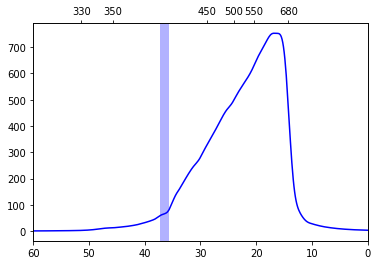

In [10]:
fig, ax = plt.subplots()

ax.plot(pixels_met_rich, bp_met_rich, 'b-')
ax.set_xlim(60,0)
ax2 = ax.twiny()

ax2.set_xlim(60,0)
wave_pos = [51.34367944742, 45.719669588983436, 28.84225802506438, 24.033280778000027, 20.437459322715004,14.265690386677687] 
label = ['330','350','450','500','550','680']
ax2.set_xticks(wave_pos)
ax2.set_xticklabels(label)

#ax2.annotate('390',xy=(37.27334893603563, max(bp_met_rich)),xycoords='data',xytext=(37.27334893603563, (max(bp_met_rich)-2)),textcoords='data',horizontalalignment='right', verticalalignment='top')
#ax2.annotate('390',xy=(37.27334893603563, max(bp_met_rich)),xycoords='data',xytext=(37.27334893603563, (max(bp_met_rich)-10)),textcoords='data',arrowprops=dict(width=0.01,headwidth=0.01,headlength=10,shrink=0.05),horizontalalignment="right")

ax.axvspan(37.27334893603563, 35.585936189453314, facecolor='b', alpha=0.3)

plt.legend()
plt.show()

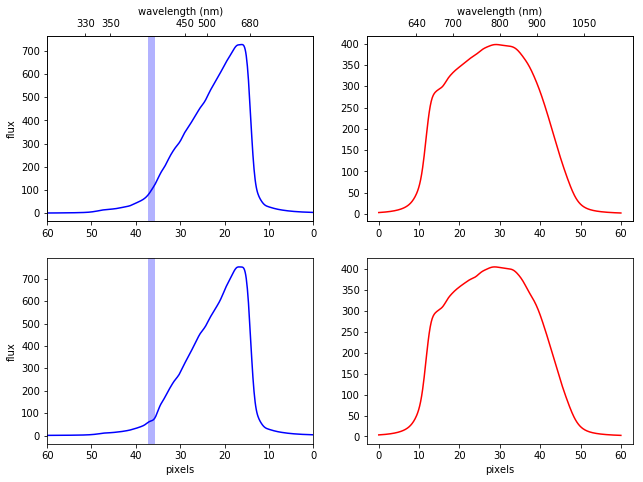

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(pixels_met_poor, bp_met_poor,'b-')

ax5 = ax1.twiny()
ax6 = ax2.twiny()

ax5.set_xlim(60,0)
ax6.set_xlim(0,60)

wave_pos_bp = [51.34367944742, 45.719669588983436, 28.84225802506438, 24.033280778000027,14.265690386677687] 
label_bp = ['330','350','450','500','680']
ax5.set_xticks(wave_pos_bp)
ax5.set_xticklabels(label_bp)

#ax5.annotate('390',xy=(37.27334893603563, max(bp_met_poor)),xycoords='data',xytext=(37.27334893603563, (max(bp_met_poor)-10)),textcoords='data',arrowprops=dict(width=0.01,headwidth=0.01,headlength=10,shrink=0.05),horizontalalignment="right")

wave_pos_rp = [11.199712338077706, 19.358812468789207, 29.98194069125956, 38.43283563931157, 48.97561141549811]
label_rp =['640','700','800','900','1050']
ax6.set_xticks(wave_pos_rp)
ax6.set_xticklabels(label_rp)

ax3.plot(pixels_met_rich, bp_met_rich,'b-')
ax2.plot(pixels_met_poor, rp_met_poor,'r-')
ax4.plot(pixels_met_rich, rp_met_rich,'r-')
ax1.set_xlim(60,0)
ax3.set_xlim(60,0)
ax3.set_xlabel('pixels')
ax4.set_xlabel('pixels')
ax1.set_ylabel('flux')
ax3.set_ylabel('flux')
ax5.set_xlabel('wavelength (nm)')
ax6.set_xlabel('wavelength (nm)')
ax1.axvspan(37.27334893603563, 35.585936189453314, facecolor='b', alpha=0.3)
ax3.axvspan(37.27334893603563, 35.585936189453314, facecolor='b', alpha=0.3)
#plt.tight_layout()

fig.set_size_inches(10.5, 7.5)
plt.show()
plt.savefig('Spectra_graph_update.png',dpi=300)


coeff_BP = [+7.509380175000E-01, -1.214620700000E+03, +1.248006218000E+06, -7.563887762000E+08, +2.499737360000E+11, -4.386634008000E+13, +3.143734670000E+15]
#print("BP coefficients", coeff_BP)



coeff_RP = [-2.010111264000E+00, +4.381088249000E+03, -4.500504745000E+06, +2.727226923000E+09, -9.010703193000E+11, +1.580837453000E+14, -1.132448176000E+16]
#print("RP coefficients", coeff_RP)


j = np.arange(0,7,1)

wave_coords = []
BP_coords = []
RP_coords = []

for i in range (3,76):
    wave_coord = 300+i*10  #wavelength in nm

    #print("wavelengths are:", wave_coord)
    
    wave_coords.append(wave_coord)
    
    w = 1/wave_coord #this has units of nm^-1
    
    BP = 0.0
    RP = 0.0


    for j in range (0,7):
        #BP = 0.0
        #RP = 0.0
        
        BP = BP+coeff_BP[j]*(w**j)
        RP = RP+coeff_RP[j]*(w**j)
        
        
        
    #print("BP is:", BP)
    #print("RP is:", RP)
        
    BP = 100*BP  #to convert from nm to mm
    RP = 100*RP
        
    BP_coord = 30 - BP
    RP_coord = 30 - RP
    
    BP_coords.append(BP_coord)
    RP_coords.append(RP_coord)
    
    #print("BP coordinates", BP_coord)
    #print("RP coordinates", RP_coord)
    
#print(np.vstack(wave_coords))
#print(np.vstack(BP_coords))
#print(np.vstack(RP_coords))

#print(wave_coords)
#print(BP_coords)

In [ ]:
#for wave_coords, BP_coords, RP_coords in zip(wave_coords, BP_coords, RP_coords):
    #print(wave_coords, BP_coords, RP_coords) #This prints out the data in a somewhat more readable format

In [ ]:
#print(ascii.read(model_atmo_data[1])['bp'])

In [ ]:
#print(wave_coords)

### Plotting a scatter plot

In [ ]:
# This loop calculates the integrated BP, RP, and CaH&K fluxes and their associated magnitudes. 
# It also extracts the values of metallicity and temperature from the filenames and puts them into a list

i = np.arange(0,(len(model_atmo_data)),1)

int_bp_fluxes = []
int_rp_fluxes = []
integ_CaHK_fluxes = []

BP_mags = []
RP_mags = []
CaHK_mags = []
colour_values = []
CaHK_BP_values = []
mag_colour_values = []
metallicities = []
temperatures = []

for i in range(0,(len(model_atmo_data))):
    
    bp_noise = np.random.normal(0,0.1,len(ascii.read(model_atmo_data[i])['bp'])) #Adding some random noise
    rp_noise = np.random.normal(0,0.1,len(ascii.read(model_atmo_data[i])['rp']))
    bp_flux = ascii.read(model_atmo_data[i])['bp'] + bp_noise
    rp_flux = ascii.read(model_atmo_data[i])['rp'] + rp_noise
    
    int_bp_flux = np.sum(bp_flux)
    int_rp_flux = np.sum(rp_flux)
    integ_CaHK_flux = np.sum(bp_flux[284:299]) #indexes for between 390nm and 400nm 
    
    int_bp_fluxes += [int_bp_flux]
    int_rp_fluxes += [int_rp_flux]
    integ_CaHK_fluxes += [integ_CaHK_flux] 
    #print(model_atmo_data[i].split("_",3)[2].split("feHm",1)[1])
    
    BP_mag = 25.35 - (2.5*(np.log10(int_bp_fluxes[i])))
    RP_mag = 24.76 - (2.5*(np.log10(int_rp_fluxes[i])))
    CaHK_mag = 22.00 - (2.5*(np.log10(integ_CaHK_fluxes[i])))
    colour = BP_mag - RP_mag
    CaHK_BP = CaHK_mag - BP_mag
    mag_colour = CaHK_BP - colour
    
    BP_mags += [BP_mag]
    RP_mags += [RP_mag]
    CaHK_mags += [CaHK_mag]
    colour_values += [colour] #BP-RP is approximately equal to colour
    CaHK_BP_values += [CaHK_BP] #This is the difference in magnitude between the CaH&K line magnitude and BP
    mag_colour_values += [mag_colour] # This is (CaH&K - BP) - (BP - RP)
    
    metal_values = model_atmo_data[i].split("_",3)[2].split("feHm",1)[1] 
    #this extracts the value of the metallicity from the file name
    metallicities += [metal_values]
    
    temp = model_atmo_data[i].split("_",2)[1].split("t",1)[1]
    #this extracts the value of the temperature from the file name
    temperatures += [temp]

#print(len(mag_colour_values))
#print(len(noise))
#print(len(metallicities))
print(max(temperatures))

In [ ]:
colour_values = np.array(colour_values)
mag_colour_values = np.array(mag_colour_values)
metallicities = np.array(metallicities)

#type(metallicities)


In [ ]:
metallicities = metallicities.astype(float)

metallicities = metallicities*-1 # This was done so the metallicities would show up correctly on the scatter plot

In [ ]:
#print(metallicities)

In [ ]:
#type(colour_values)

In [ ]:
#type(mag_colour_values)

In [ ]:
known_metallicities = [-0.25,-0.5,-0.75,-1.,-1.5,-2.,-2.5,-3.,-3.5,-4.,-4.5,-5.]

#print(known_metallicities)
#print(metallicities)

#print(len(known_metallicities))

In [ ]:
class Metallicity_dataset:
    
    def __init__(self, kM, km_colour, km_mag_colour):
        
        self.kM = kM       
        self.km_colour = km_colour
        self.km_mag_colour = km_mag_colour 
# necessary to add self to every method you want to have in a particular class
#each object has three attributes: known metallicity, colour value, and magnitude minus colour

In [ ]:

metal_datalist = [] 
#this is an array of objects where each known metallicity has all the values of (BP - RP) and (CaH&K - BP) - (BP - RP) associated
#with that metallicity
    

for kM in known_metallicities:
    #print("Extracting known metallicities",kM)
    km_colour = []  #this is an array for all the values of BP - RP
    km_mag_colour = [] #this is an array for all the values of (CaH&K - BP) - (BP - RP)
    
    for i in range(0,(len(metallicities))):
        #print(kM, metallicities[i],colour_values[i],mag_colour_values[i])

        if metallicities[i] == kM:
            #print("known metallicities are", kM)
            #print("colour values are", colour_values[i])
            #print("mag - colour values are", mag_colour_values[i])
            
            km_colour.append(colour_values[i])
            km_mag_colour.append(mag_colour_values[i])
            
    #print((len(km_mag_colour)))
    #print((len(km_colour)))
        

    metal_datalist.append(Metallicity_dataset(kM, km_colour, km_mag_colour))
    
    
    #end of the appending, obtained all values with the current kM, now I can do the fit
           
print("finished")            

In [ ]:
## This bit of code plots a scatter graph with a colour bar ##

fig, ax = plt.subplots()
ax.set_ylim(1.5,0.0)
ax.set_xlim(0,2)
im = ax.scatter(colour_values, mag_colour_values, c=metallicities)
fig.colorbar(im, ax=ax)
ax.set_xlabel('(BP-RP)')
ax.set_ylabel('(CaHK-BP)-(BP-RP)')
#ax.set_title("Difference in magnitude against colour")

plt.show()
plt.savefig('Graph of all stars.png',dpi=300)

In [ ]:
## Code for plotting a scatter graph with multiple lines of best fit based on metallicity ##
fig, ax = plt.subplots()
ax.set_ylim(1.5,0.0)
ax.set_xlim(0,2)
im = ax.scatter(colour_values, mag_colour_values, c=metallicities)
fig.colorbar(im, ax=ax)
ax.set_xlabel('(BP-RP)')
ax.set_ylabel('(CaHK-BP)-(BP-RP)')
#ax.set_title("Difference in magnitude against colour")

for self in metal_datalist:
    #print("extracting metallicity from data set",self.kM)
    
    line_best_fit = np.poly1d(np.polyfit(self.km_colour, self.km_mag_colour, 5))
    plt.plot(self.km_colour,line_best_fit(self.km_colour),'k--')
    
## This loop here plots a line for each metallicity
    
    
plt.show()
#plt.savefig('Graph of metal-poor stars.png',dpi=300)

### Plotting a graph of temperature against colour

This section of the code shows the plotting of a graph of temperature against (BP - RP) for dwarf stars and giant stars. For this, I used log(g) of 5.0 for dwarf stars and log(g) of 1.0 for giant stars.

In [ ]:
model_atmo_data_dwarf = []

for each_file in glob.glob('*g5.0*.ascii'):
    model_atmo_data_dwarf.append(each_file)
    

print(len(model_atmo_data_dwarf))

In [ ]:
model_atmo_data_giant = []

for each_file in glob.glob('*g1.0*.ascii'):
    model_atmo_data_giant.append(each_file)
    

print(len(model_atmo_data_giant))

In [ ]:
i = np.arange(0,(len(model_atmo_data_dwarf)),1)

int_bp_fluxes = []
int_rp_fluxes = []
integ_CaHK_fluxes = []

BP_mags = []
RP_mags = []
CaHK_mags = []
colour_values_dwarf = []
CaHK_BP_values = []
mag_colour_values = []
metallicities = []
temperatures_dwarf = []

for i in range(0,(len(model_atmo_data_dwarf))):
    
    bp_noise = np.random.normal(0,0.1,len(ascii.read(model_atmo_data_dwarf[i])['bp']))
    rp_noise = np.random.normal(0,0.1,len(ascii.read(model_atmo_data_dwarf[i])['rp']))
    bp_flux = ascii.read(model_atmo_data_dwarf[i])['bp'] + bp_noise
    rp_flux = ascii.read(model_atmo_data_dwarf[i])['rp'] + rp_noise
    
    int_bp_flux = np.sum(bp_flux)
    int_rp_flux = np.sum(rp_flux)
    integ_CaHK_flux = np.sum(bp_flux[284:299]) #indexes for between 390nm and 400nm 
    
    int_bp_fluxes += [int_bp_flux]
    int_rp_fluxes += [int_rp_flux]
    integ_CaHK_fluxes += [integ_CaHK_flux] 
    #print(model_atmo_data[i].split("_",3)[2].split("feHm",1)[1])
    
    BP_mag = 25.35 - (2.5*(np.log10(int_bp_fluxes[i])))
    RP_mag = 24.76 - (2.5*(np.log10(int_rp_fluxes[i])))
    CaHK_mag = 22.00 - (2.5*(np.log10(integ_CaHK_fluxes[i])))
    colour = BP_mag - RP_mag
    CaHK_BP = CaHK_mag - BP_mag
    mag_colour = CaHK_BP - colour
    
    BP_mags += [BP_mag]
    RP_mags += [RP_mag]
    CaHK_mags += [CaHK_mag]
    colour_values_dwarf += [colour] #BP-RP is approximately equal to colour
    CaHK_BP_values += [CaHK_BP] #This is the difference in magnitude between the CaH&K line magnitude and bp
    mag_colour_values += [mag_colour]
    
    metal_values = model_atmo_data_dwarf[i].split("_",3)[2].split("feHm",1)[1] 
    #this extracts the value of the metallicity from the file name
    metallicities += [metal_values]
    
    temp = model_atmo_data_dwarf[i].split("_",2)[1].split("t",1)[1]
    #this extracts the value of the temperature from the file name
    temperatures_dwarf += [temp]

In [ ]:
i = np.arange(0,(len(model_atmo_data_giant)),1)

int_bp_fluxes = []
int_rp_fluxes = []
integ_CaHK_fluxes = []

BP_mags = []
RP_mags = []
CaHK_mags = []
colour_values_giant = []
CaHK_BP_values = []
mag_colour_values = []
metallicities = []
temperatures_giant = []

for i in range(0,(len(model_atmo_data_giant))):
    
    bp_noise = np.random.normal(0,0.1,len(ascii.read(model_atmo_data_giant[i])['bp']))
    rp_noise = np.random.normal(0,0.1,len(ascii.read(model_atmo_data_giant[i])['rp']))
    bp_flux = ascii.read(model_atmo_data_giant[i])['bp'] + bp_noise
    rp_flux = ascii.read(model_atmo_data_giant[i])['rp'] + rp_noise
    
    int_bp_flux = np.sum(bp_flux)
    int_rp_flux = np.sum(rp_flux)
    integ_CaHK_flux = np.sum(bp_flux[284:299]) #indexes for between 390nm and 400nm 
    
    int_bp_fluxes += [int_bp_flux]
    int_rp_fluxes += [int_rp_flux]
    integ_CaHK_fluxes += [integ_CaHK_flux] 
    #print(model_atmo_data[i].split("_",3)[2].split("feHm",1)[1])
    
    BP_mag = 25.35 - (2.5*(np.log10(int_bp_fluxes[i])))
    RP_mag = 24.76 - (2.5*(np.log10(int_rp_fluxes[i])))
    CaHK_mag = 22.00 - (2.5*(np.log10(integ_CaHK_fluxes[i])))
    colour = BP_mag - RP_mag
    CaHK_BP = CaHK_mag - BP_mag
    mag_colour = CaHK_BP - colour
    
    BP_mags += [BP_mag]
    RP_mags += [RP_mag]
    CaHK_mags += [CaHK_mag]
    colour_values_giant += [colour] #BP-RP is approximately equal to colour
    CaHK_BP_values += [CaHK_BP] #This is the difference in magnitude between the CaH&K line magnitude and bp
    mag_colour_values += [mag_colour]
    
    metal_values = model_atmo_data_giant[i].split("_",3)[2].split("feHm",1)[1] 
    #this extracts the value of the metallicity from the file name
    metallicities += [metal_values]
    
    temp = model_atmo_data_giant[i].split("_",2)[1].split("t",1)[1]
    #this extracts the value of the temperature from the file name
    temperatures_giant += [temp]

In [ ]:
### This plots a graph of temperature against colour. ###

plt.figure()
plt.grid(True)#This forms a grid underneath the data, making the data easier to read
plt.plot(colour_values_giant,temperatures_giant,'b.',label="Giant stars") 
plt.plot(colour_values_dwarf,temperatures_dwarf,'k.',label="Dwarf stars") 
plt.legend()
plt.title('Temperature against colour')#This codes for the title of the graph 
plt.xlabel('(BP - RP)') #This labels the x-axis    
plt.ylabel('Temperature')#This labels the y-axis
plt.show()
plt.savefig('Temperature against colour.png',dpi=300)

In [ ]:
# This piece of code is useful for reading a file from a different folder #

#filename = '\\Users\\Florence\\Documents\\Summer_research_project_Cambridge\\singleSpectra\\csvFiles\\gaia_t2500_feHm0.5_g0.5.ascii'

#data1 = ascii.read(filename)

#print(data1)